<font size = 8 color ='336EFF'>Simulated Annealing</font>

Import Libraries

In [ ]:
# Simulated Annealing search of a one-dimensional objective function
import numpy as np
from numpy import asarray
from numpy import arange
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

#Define Objective Function

In [ ]:
# objective function
def objective(x):
    return x[0]**2.0 + 30*np.sin(x[0]) #(x[0] - 2)*(x[0] - 1)*(x[0] + 1)*(x[0] + 3)-10#x[0]**2.0

In [ ]:
def reset_boud(x, bounds):
    for n in range(bounds.shape[0]):
        if x[n] < bounds[n, 0]:
            x[n] = bounds[n, 0]
        if x[n] > bounds[n, 1]:
            x[n] = bounds[n, 1]
    return x

Define auxiliary function for plotting

In [ ]:
def plotCurrentSolution(bounds, candidate, bestSolution):
    # sample input range uniformly at 0.1 increments
    inputs = arange(bounds[0,0], bounds[0,1], 0.1)
    # create a line plot of input vs result
    plt.clf()
    plt.plot(inputs, [objective([x]) for x in inputs], '--')
    # draw a vertical line at the optimal input
    plt.axvline(x=[0.0], ls='--', color='red')
    # plot the sample as black circles
    plt.plot(candidate, objective(candidate), 'o', color='black')
    plt.plot(bestSolution, objective(bestSolution), 'o', color='red')
    plt.draw()#plt.show()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.001)

# Define Simulated Annealing function

In [ ]:
# Simulated Annealing local search algorithm
def simulatedAnnealing(objective, bounds, n_iterations, step_size, Tini, Tfin, maxEpochs):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    solution_eval = objective(solution)
    # run the Simulated Annealing
    deltaT = (Tini - Tfin)/maxEpochs

    solutions = list()
    solutions.append(solution)

    for epoch in range(maxEpochs):
        T = Tini - deltaT * epoch

        for i in range(n_iterations):
            candidate = solution + randn(len(bounds)) * step_size
            deltae = objective(candidate) - objective(solution)
            if deltae < 0:
                solution = candidate
            else:
                P = np.exp(-deltae/T)
                if rand(1) <= P:
                    solution = candidate

            solution = reset_boud(solution, bounds)

        solutions.append(solution)
        # report progress
        print('>%d f(%s) = %.5f' % (epoch, solution, solution_eval))
        plotCurrentSolution(bounds, solutions[-2], solution)

    solution_eval = objective(solution)
    return [solution, solution_eval, solutions]

Define Main Function

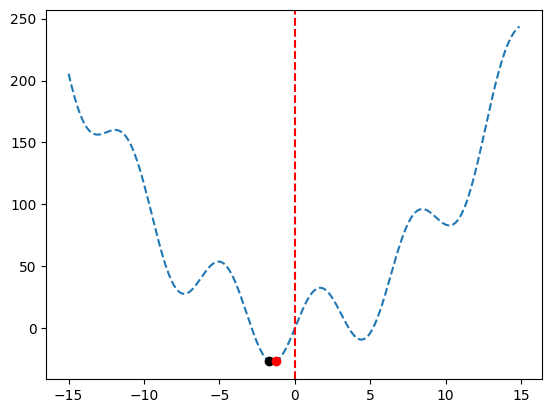

Done!
f([-1.22526826]) = -26.725620


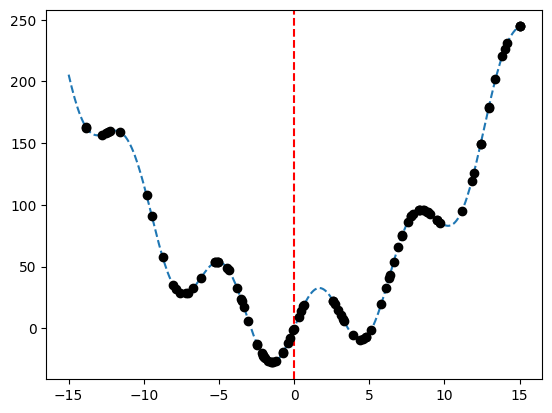

In [ ]:
# seed the pseudorandom number generator
# seed(5)
# define range for input
bounds = asarray([[-15.0, 15.0]])
# define the maximum number of iterations
n_iterations = 50
# define the maximum step size
step_size = 1.0

Tini = 1000
Tfin = 0.01
totalEpochs = 100
# perform the Simulated Annealing search
best, score, solutions = simulatedAnnealing(objective, bounds, n_iterations, step_size, Tini, Tfin, totalEpochs)
print('Done!')
print('f(%s) = %f' % (best, score))

# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1], 0.1)
# create a line plot of input vs result
plt.plot(inputs, [objective([x]) for x in inputs], '--')
# draw a vertical line at the optimal input
plt.axvline(x=[0.0], ls='--', color='red')
# plot the sample as black circles
plt.plot(solutions, [objective(x) for x in solutions], 'o', color='black')
plt.show()